In [69]:
import aifc

In [71]:
file_name = 'flute.aiff'
file = aifc.open(file_name)

In [72]:
file.getcompname()

b'not compressed'

In [74]:
def metadata(aiff_file):
    metadata = {
        '            channels ' : aiff_file.getnchannels(),
        ' sample depth (bits) ' : 8*aiff_file.getsampwidth(),
        '  samples per second ' : aiff_file.getframerate(),
        ' length (in samples) ' : aiff_file.getnframes()
    }
    return metadata

In [75]:
for key, value in metadata(file).items():
    print(f'{key}| {value}')

            channels | 1
 sample depth (bits) | 16
  samples per second | 44100
 length (in samples) | 133120


In [84]:
import numpy as np

data = file.readframes(10000)
sig = np.frombuffer(data, dtype='>u2')

In [79]:
print(sig.shape)
sig2 = sig.copy()
sig2[:,0] = sig2[:,0].astype('i1')

(10000, 1)


In [85]:
data

b'\x04\xd3\xfb\xf0\xf5_\xf3\xbd\xef\x11\xeeQ\xf0P\xf7\x8e\xfe\x12\x006\x02\xa4\x02\xd0\x02\x1e\x06\x94\n\xa5\r\x7f\x0f8\x0f\xa3\x0c\xd2\x07\x9c\x01.\xf9g\xf3!\xf0k\xed\t\xefX\xf3\x99\xfa\x11\xfd\xbd\x00\xd2\x03+\x01\xdf\x04\x96\x08L\x0b\xfb\r\xb2\x0e\xef\x0el\n\x11\x02\x94\xfc2\xf6l\xf0\xee\xedZ\xef"\xf2\xaa\xf7s\xfe\xcf\x01\xab\x05\x13\x04\x8a\x03\xda\x07\xf5\x0b\x10\x0e-\x0e(\x0c\xf1\x0c1\x06.\xfd\xaf\xf8\x13\xf1\xeb\xef\xb7\xefh\xee\x94\xf4\xa8\xfc\xf0\xff\xa3\x02s\x04\x01\x04\xe8\x05\x9c\x08J\x0ch\x0f\x04\x0e\x9c\x0c\xf0\t\x9c\x03W\xfb$\xf6\x05\xf1\x1c\xee\xa3\xee\xdd\xf2U\xf8\x10\xfd\n\x01{\x03N\x02Y\x02\xfa\x07\x89\n\xb5\x0b\xbb\r\x8d\x0e \x0b\xe0\x06G\x00A\xf8\xed\xf4G\xf0M\xee\xd5\xf02\xf5\x1b\xfb\x97\xff#\x01L\x01l\x024\x03\x16\x06\x9e\n\xb9\r\xc9\r\xf5\ri\nN\x03\xf0\xfb\xf7\xf4\xba\xf1\xc1\xeer\xef:\xf3M\xfal\xfe\xd1\x02\x12\x04\x9e\x04\x8c\x05\x17\x07,\x0b0\r\xa3\x0c\xf2\x0c\xdb\tm\x03\x86\xfcp\xf5\xe2\xf3g\xef\xbe\xeeh\xf0U\xf6\xf9\xfb\xeb\x00P\x03\x04\x04P\x03z\x07\x06\t\x

In [86]:
sig[:100]

array([ 1235, 64496, 62815, 62397, 61201, 61009, 61520, 63374, 65042,
          54,   676,   720,   542,  1684,  2725,  3455,  3896,  4003,
        3282,  1948,   302, 63847, 62241, 61547, 60681, 61272, 62361,
       64017, 64957,   210,   811,   479,  1174,  2124,  3067,  3506,
        3823,  3692,  2577,   660, 64562, 63084, 61678, 60762, 61218,
       62122, 63347, 65231,   427,  1299,  1162,   986,  2037,  2832,
        3629,  3624,  3313,  3121,  1582, 64943, 63507, 61931, 61367,
       61288, 61076, 62632, 64752, 65443,   627,  1025,  1256,  1436,
        2122,  3176,  3844,  3740,  3312,  2460,   855, 64292, 62981,
       61724, 61091, 61149, 62037, 63504, 64778,   379,   846,   601,
         762,  1929,  2741,  3003,  3469,  3616,  3040,  1607,    65,
       63725], dtype=uint16)

In [334]:
left = (256**2)*(sig[:,2].astype('uint32')) + (256*(sig[:,1].astype('uint32'))) + (sig[:,0].astype('uint32'))
right = (256**2)*(sig[:,5].astype('uint32')) + (256*(sig2[:,4].astype('uint32'))) + (sig[:,3].astype('uint32'))

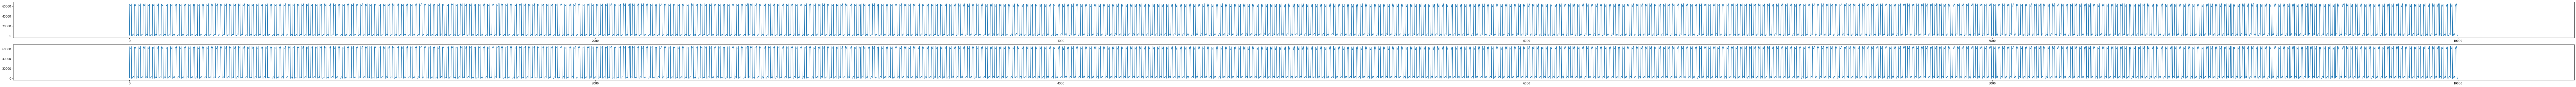

In [88]:
fig, axes = plt.subplots(2,1,figsize=(160,5))

x = list(range(sig.shape[0]))
##y1 = [y for y in left]
##y2 = [y for y in right]

axes[0].plot(x, sig)
axes[1].plot(x, sig)

[0, 59, 6, 0, 59, 6, 0, 53, 138, 0]


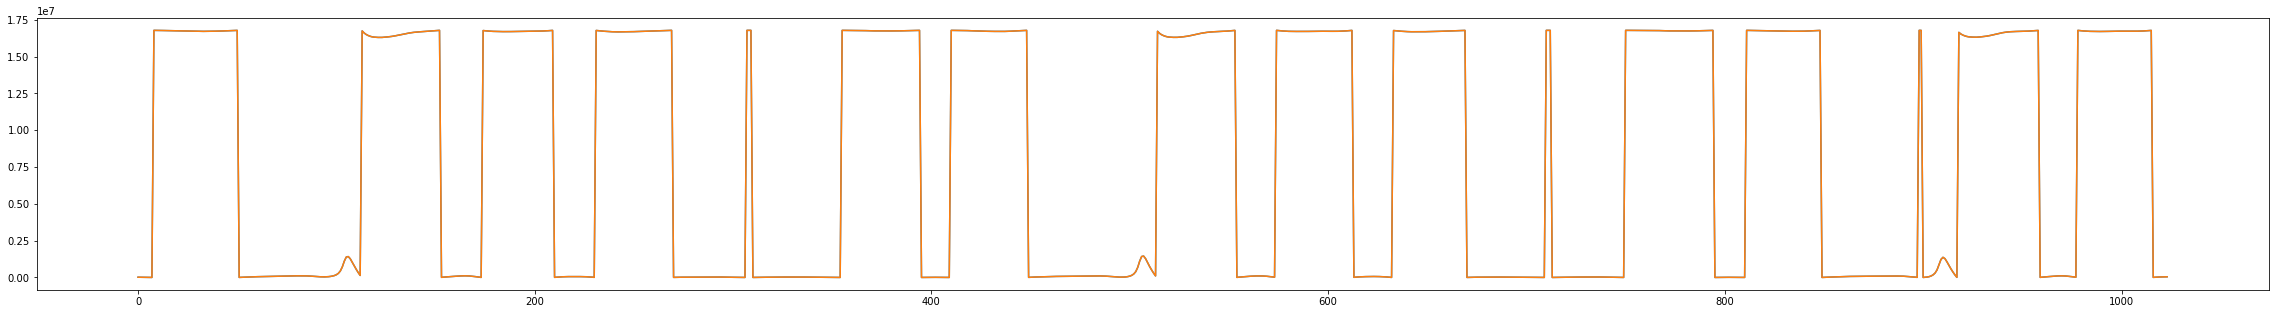

In [166]:
data = file.readframes(1024)
#print(data)
def parse(sample):
    left = (256**2)*sample[0] + 256*sample[1] + sample[2]
    right = (256**2)*sample[3] + 256*sample[4] + sample[5]
    return (left, right)
data[:10]
print(list(data)[:10])
samples = list((zip(list(data)[0::6],list(data)[1::6],list(data)[2::6],list(data)[3::6],list(data)[4::6],list(data)[5::6])))
#print(samples)
data2 = list(map(parse, samples))
#print(data2)

#print(data)
#def funct(string):
#    return string.replace('\\\\', '\\')
#                          
#thing = list(map(funct, str(data).split('\\x')[1:]))
#thing
x = list(range(0,1024))
y1 = list(map(lambda x: x[0], data2))
y2 = list(map(lambda x: x[1], data2))

fig, ax = plt.subplots(figsize=(40,5))

ax.plot(x, y1)
ax.plot(x, y2)

In [67]:
data2 = str(data)
data2.split("\\x")

["b'",
 'ff',
 'ff',
 'de',
 'ff',
 'ff',
 'de',
 'ff',
 'ff',
 'de',
 'ff',
 'ff',
 'de',
 'ff',
 'ff',
 'de',
 'ff',
 'ff',
 'de',
 'ff',
 'ff',
 'de',
 'ff',
 'ff',
 'de',
 '00',
 '00V',
 '00',
 '00V',
 'ff',
 'ff',
 'dd',
 'ff',
 'ff',
 'dd',
 '00',
 '00U',
 '00',
 '00U',
 '00',
 '00T',
 '00',
 '00T',
 'ff',
 'ff',
 'dc',
 'ff',
 'ff',
 'dc',
 'ff',
 'ff',
 'dc',
 'ff',
 'ff',
 'dc',
 'ff',
 'ff',
 'dc',
 'ff',
 'ff',
 'dc',
 '00',
 '00S',
 '00',
 '00S',
 'ff',
 'ff',
 'dc',
 'ff',
 'ff',
 'dc',
 'ff',
 'ff',
 'db',
 'ff',
 'ff',
 'db',
 'ff',
 'ff',
 'dc',
 'ff',
 'ff',
 'dc',
 'ff',
 'ff',
 'dc',
 'ff',
 'ff',
 'dc',
 'ff',
 'ff',
 'dd',
 'ff',
 'ff',
 'dd',
 'ff',
 'fff',
 'ff',
 'fff',
 'ff',
 'ff',
 'de',
 'ff',
 'ff',
 'de',
 'ff',
 'ff',
 'de',
 'ff',
 'ff',
 'de',
 'ff',
 'ff',
 'de',
 'ff',
 'ff',
 'de',
 'ff',
 'ff',
 'df',
 'ff',
 'ff',
 'df',
 '00',
 '00U',
 '00',
 '00U',
 '00',
 '00U',
 '00',
 '00U',
 'ff',
 'ff',
 'dd',
 'ff',
 'ff',
 'dd',
 'ff',
 'ff',
 'dc',
 'ff',

In [ ]:
data2 = np.fromstring(data, numpy.uint32)

In [139]:
import pandas as pd

In [140]:
import matplotlib.pyplot as plt

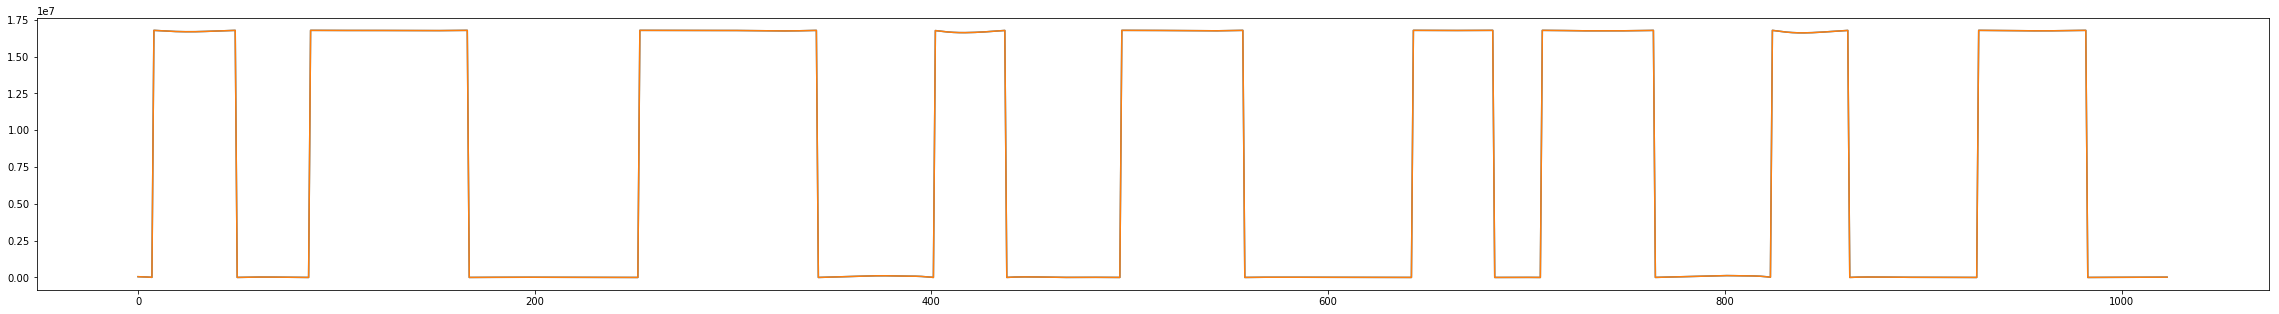

In [141]:
fig, ax = plt.subplots(figsize=(40,5))

ax.plot(x, y1)
ax.plot(x, y2)

In [342]:
!pip install audioread

In [ ]:
with audioread.audio_open(filename) as f:
    print(f.channels, f.samplerate, f.duration)
    for buf in f:
        do_something(buf)

In [89]:
import audioread

f = audioread.audio_open('flute.aiff')

In [90]:
print(f.channels, f.samplerate, f.duration)

1 44100 3.01859410430839


In [91]:
type(f)

audioread.rawread.RawAudioFile

In [92]:
result = []

for buf in f:
    result.append(list(buf))
    

In [93]:
result_joined = [value for sublist in result for value in sublist]

In [61]:
left_channel= 256*np.array(result_joined[0::4]) + np.array(result_joined[1::4])
right_channel= 256*np.array(result_joined[2::4]) + np.array(result_joined[3::4])

In [67]:
np.any(right_channel-left_channel)

False

In [98]:
result2 = np.array(result_joined[0::2]) + 256*np.array(result_joined[1::2])

In [45]:
result2 = {}
for i in range(len(result)):
    result2[i] = (np.array[result[i][0::2], result[i][1::2])

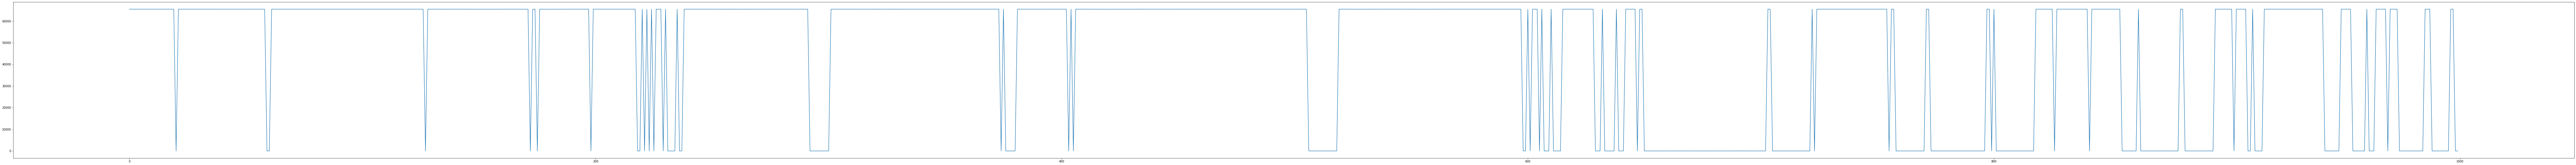

In [99]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(160,10))

y = result2[:1000]
x = list(range(len(y)))


ax.plot(x, y)

In [47]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,1,figsize=(160,10))

x = list(range(2048))
y1 = result2[0]
y2 = result2[1]

axes[0].plot(x, y1)
axes[1].plot(x, y2)

ValueError: x and y must have same first dimension, but have shapes (2048,) and (2, 2048)

In [101]:
!pip install librosa

In [105]:
import librosa.core as lrc
import librosa.display as lrd

In [104]:
series = lrc.load('flute.aiff')

In [125]:
snippet = series[0][0:1000]

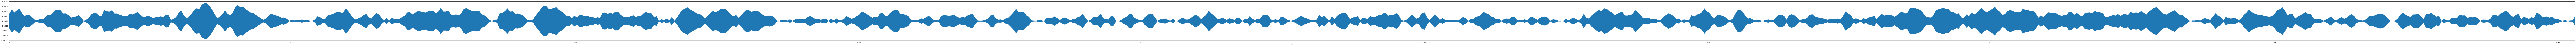

In [127]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(320,5))

lrd.waveplot(snippet, ax=ax)

ax.s